In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.read_csv('../Files/Logistic_Regression_Binary/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [19]:
multivariate_model = linear_model.LinearRegression()
multivariate_model.fit(df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']], df.left)

LinearRegression()

In [20]:
multivariate_model.coef_

array([-6.59167242e-01,  9.89705187e-02, -3.46379974e-02,  6.45661737e-04,
        3.34831668e-02, -1.56896618e-01, -1.61137963e-01])

In [21]:
multivariate_model.intercept_

0.48207294298106973

salary
high      1155
low       5144
medium    5129
dtype: int64
salary
high      1237
low       7316
medium    6446
dtype: int64
salary
high      93.371059
low       70.311646
medium    79.568725
dtype: float64
retention rate index:  Index(['high', 'low', 'medium'], dtype='object', name='salary')


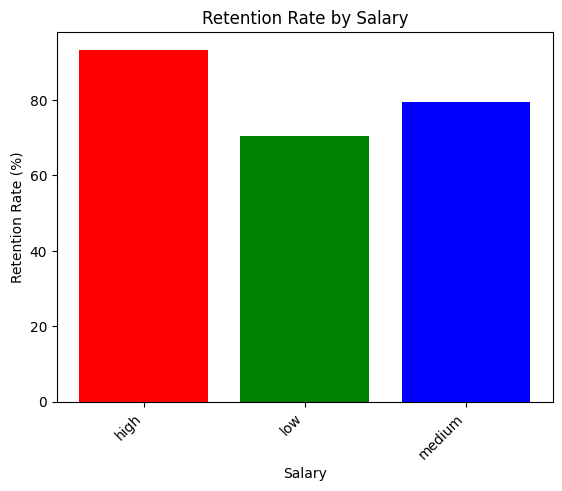

In [41]:
retained_count = df[df['left'] == 0].groupby('salary').size()
print(retained_count)

# Calculate the total number of employees in each salary category
total_count = df.groupby('salary').size()
print(total_count)

# Calculate the retention rate for each salary category
retention_rate = (retained_count / total_count) * 100
print(retention_rate)
print('retention rate index: ',retention_rate.index)

# Plotting the bar chart
plt.bar(retention_rate.index, retention_rate, color=['red', 'green', 'blue'])

# Adding labels and title
plt.xlabel('Salary')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate by Salary')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

salary
high        82
low       2172
medium    1317
dtype: int64
salary
high      1237
low       7316
medium    6446
dtype: int64
salary
high       6.628941
low       29.688354
medium    20.431275
dtype: float64


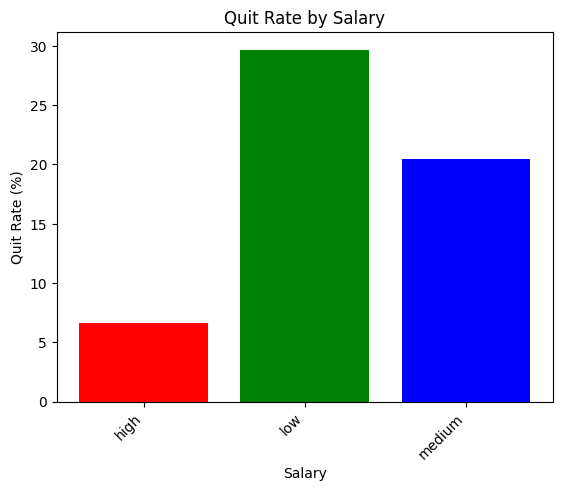

In [19]:
quit_count_salary = df[df['left'] == 1].groupby('salary').size()
print(quit_count_salary)

# Calculate the total number of employees in each salary category
total_count_salary = df.groupby('salary').size()
print(total_count_salary)

# Calculate the retention rate for each salary category
quit_rate_salary = (quit_count_salary / total_count_salary) * 100
print(quit_rate_salary)

# Plotting the bar chart
plt.bar(quit_rate_salary.index, quit_rate_salary, color=['red', 'green', 'blue'])

# Adding labels and title
plt.xlabel('Salary')
plt.ylabel('Quit Rate (%)')
plt.title('Quit Rate by Salary')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

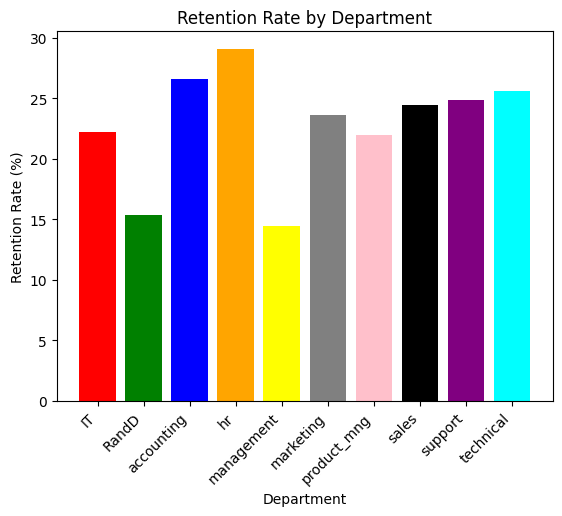

In [21]:
quit_count_dept = df[df['left'] == 1].groupby('Department').size()

# Calculate the total number of employees in each salary category
total_count_dept = df.groupby('Department').size()

# Calculate the retention rate for each salary category
retention_rate_dept = (quit_count_dept / total_count_dept) * 100

# Plotting the bar chart
plt.bar(retention_rate_dept.index, retention_rate_dept, color=['red', 'green', 'blue','orange','yellow','grey','pink','black','purple','cyan'])

# Adding labels and title
plt.xlabel('Department')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate by Department')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [45]:
model = linear_model.LogisticRegression()

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df[['last_evaluation','satisfaction_level','average_montly_hours']],df['left'],train_size=0.999)

In [52]:
X_test

,last_evaluation,satisfaction_level,average_montly_hours
5404,0.70,0.52,247
5692,0.60,0.79,161
5668,0.55,0.77,225
641,0.97,0.74,228
11578,0.56,0.76,222
517,0.86,0.09,309
14597,0.93,0.10,298
6966,0.49,0.90,185
7318,0.49,0.49,245
8308,0.68,0.63,191


In [53]:
y_test

5404     0
5692     0
5668     0
641      1
11578    0
517      1
14597    1
6966     0
7318     0
8308     0
14060    0
7196     0
5409     0
4352     0
806      1
Name: left, dtype: int64

In [54]:
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [56]:
model.score(X_test,y_test)

0.8